# Libraries

In [28]:
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.patches as patches


# Data Preprocess
In this section, we'll load and preprocess satellite images to prepare them for a machine learning model aimed at detecting planes. The process involves organizing images, converting their color schemes, and splitting the dataset for model training and evaluation.


In [2]:
# Assuming basepath is correctly set to point to the directory containing the images
basepath = "./data/planesnet/planesnet/"

# Placeholder lists for images and labels
images = []
labels = []

# Pattern to match all .png files
image_paths = glob(os.path.join(basepath, "*.png"))

# Process each image file
for img_path in image_paths:
    # Read the image
    img = cv2.imread(img_path)
    
    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Normalize pixel values
    img = img / 255.0
    
    # Append image to the list
    images.append(img)
    
    # Extract label from filename (0 or 1 prefix indicates the class)
    label = int(os.path.basename(img_path)[0])
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images, dtype=np.float32)
labels = np.array(labels, dtype=np.int64)  # Adjusted for NumPy compatibility

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_validation = to_categorical(y_validation, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

print(f"Training set: {X_train.shape[0]} images")
print(f"Validation set: {X_validation.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")


Training set: 22400 images
Validation set: 6432 images
Test set: 3168 images


# 3 - Define the Convolutional Neural Network

In [6]:
# Define the Neural Network
model = Sequential()
n_classes = 2

model.add(Conv2D(32, (3, 3), activation='linear', input_shape = (20, 20, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(n_classes, activation='softmax'))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 20, 20, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 10, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 256)            │             

 Total params: 670,594 (2.56 MB)

 Trainable params: 668,994 (2.55 MB)

 Non-trainable params: 1,600 (6.25 KB)

# 4 - Compile and fit the model

In [9]:
# Compile and fit the NN 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("plane_detection.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=1, validation_data=(X_validation, y_validation), callbacks=[checkpoint])

Epoch 1/40
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7923 - loss: 0.4528
Epoch 1: val_accuracy improved from -inf to 0.75404, saving model to plane_detection.keras
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7923 - loss: 0.4527 - val_accuracy: 0.7540 - val_loss: 0.6420
Epoch 2/40
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9055 - loss: 0.2273
Epoch 2: val_accuracy improved from 0.75404 to 0.94729, saving model to plane_detection.keras
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.9055 - loss: 0.2273 - val_accuracy: 0.9473 - val_loss: 0.1422
Epoch 3/40
1399/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9274 - loss: 0.1915
Epoch 3: val_accuracy improved from 0.94729 to 0.95833, saving model to plane_detection.keras
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.9274 - loss: 0.1915 - val_accuracy: 0.9583 - val_loss: 0.1202
Epoch 4/40
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9370 - loss: 0.1644
Ep

# 5 - Evaluate the model

In [10]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9854 - loss: 0.0464
Test Loss: 0.041025009006261826
Test Accuracy: 0.9870581030845642


# 6 - Show accuracy and loss plots of the model

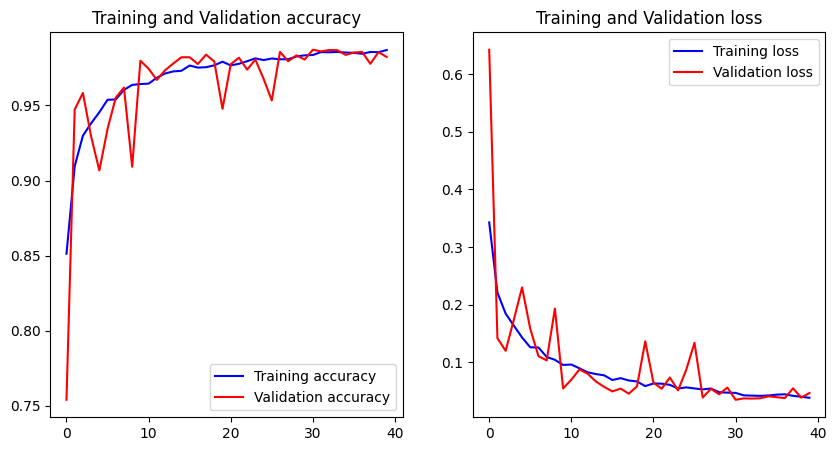

In [13]:
# Show accuracy and loss plots of the model 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# 7 - Predict

In [14]:
# Obtain predictions
predicted_class = model.predict(X_test)

predicted_class_probability = np.max(predicted_class, axis=1)*100
predicted_class = np.argmax(predicted_class, axis=1)
true_class = np.argmax(y_test, axis=1)

correct = []
incorrect = []

for i in range(len(predicted_class)):
    if predicted_class[i] == true_class[i]:
        correct.append(i)
    else:
        incorrect.append(i)

print('Correct predictions: ', len(correct))        
print('Incorrect predictions: ', len(incorrect))  

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Correct predictions:  3127
Incorrect predictions:  41


# 8 - Show CORRECT predictions

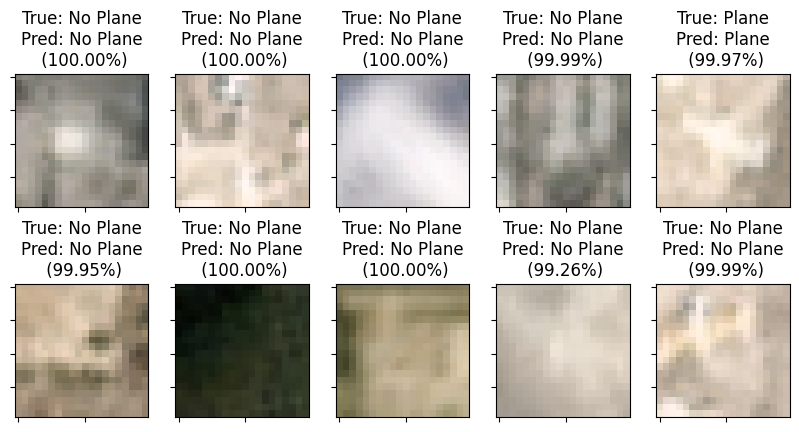

In [18]:
random.shuffle(correct)
random.shuffle(incorrect)
text_labels = ['No Plane', 'Plane']

# Show some CORRECT PREDICTIONS
n_rows = 2
n_cols = 5

plt.figure(figsize=(10, 5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[correct[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(text_labels[true_class[correct[i]]]) + 
              '\nPred: ' + str(text_labels[predicted_class[correct[i]]]) +
              '\n' + " (%.2f%%)" % predicted_class_probability[correct[i]])

# 9 - Show INCORRECT predictions

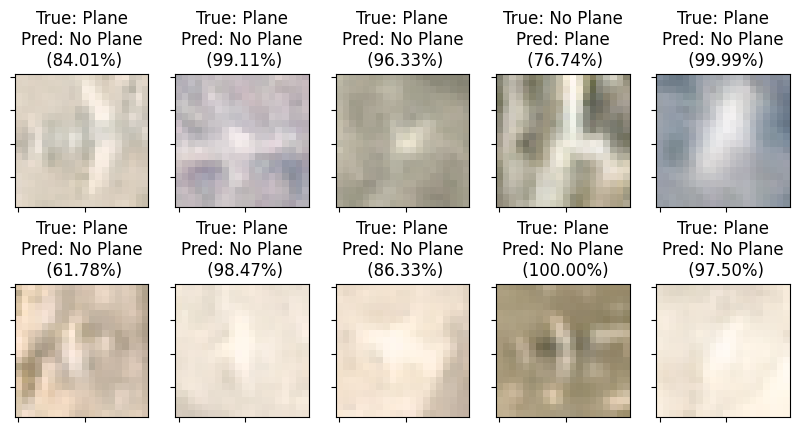

In [19]:
# Show some INCORRECT PREDICTIONS
n_rows = 2
n_cols = 5

plt.figure(figsize=(10, 5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[incorrect[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(text_labels[true_class[incorrect[i]]]) + 
              '\nPred: ' + str(text_labels[predicted_class[incorrect[i]]]) +
              '\n' + " (%.2f%%)" % predicted_class_probability[incorrect[i]])

# 10 - Show Confussion Matrix

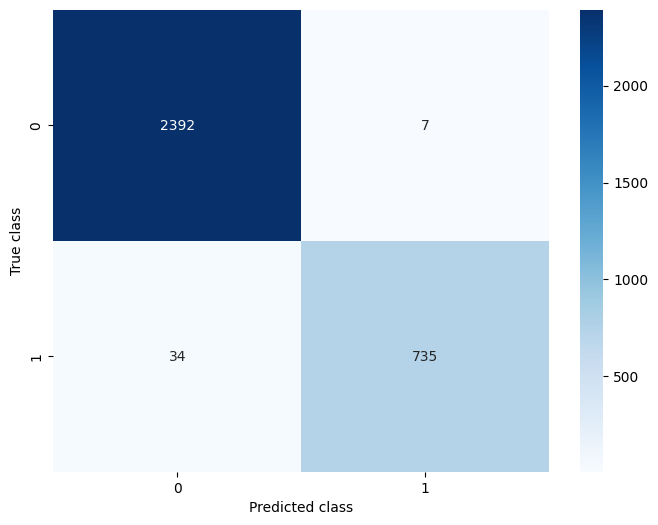

In [24]:
# Show confussion Matrix
cm = confusion_matrix(true_class, predicted_class)
plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

# 11 - Identify planes on scene

Step 0 of 145
Step 1 of 145
Step 2 of 145
Step 3 of 145
Step 4 of 145
Step 5 of 145
Step 6 of 145
Step 7 of 145
Step 8 of 145
Step 9 of 145
Step 10 of 145
Step 11 of 145
Step 12 of 145
Step 13 of 145
Step 14 of 145
Step 15 of 145
Step 16 of 145
Step 17 of 145
Step 18 of 145
Step 19 of 145
Step 20 of 145
Step 21 of 145
Step 22 of 145
Step 23 of 145
Step 24 of 145
Step 25 of 145
Step 26 of 145
Step 27 of 145
Step 28 of 145
Step 29 of 145
Step 30 of 145
Step 31 of 145
Step 32 of 145
Step 33 of 145
Step 34 of 145
Step 35 of 145
Step 36 of 145
Step 37 of 145
Step 38 of 145
Step 39 of 145
Step 40 of 145
Step 41 of 145
Step 42 of 145
Step 43 of 145
Step 44 of 145
Step 45 of 145
Step 46 of 145
Step 47 of 145
Step 48 of 145
Step 49 of 145
Step 50 of 145
Step 51 of 145
Step 52 of 145
Step 53 of 145
Step 54 of 145
Step 55 of 145
Step 56 of 145
Step 57 of 145
Step 58 of 145
Step 59 of 145
Step 60 of 145
Step 61 of 145
Step 62 of 145
Step 63 of 145
Step 64 of 145
Step 65 of 145
Step 66 of 145
Step 

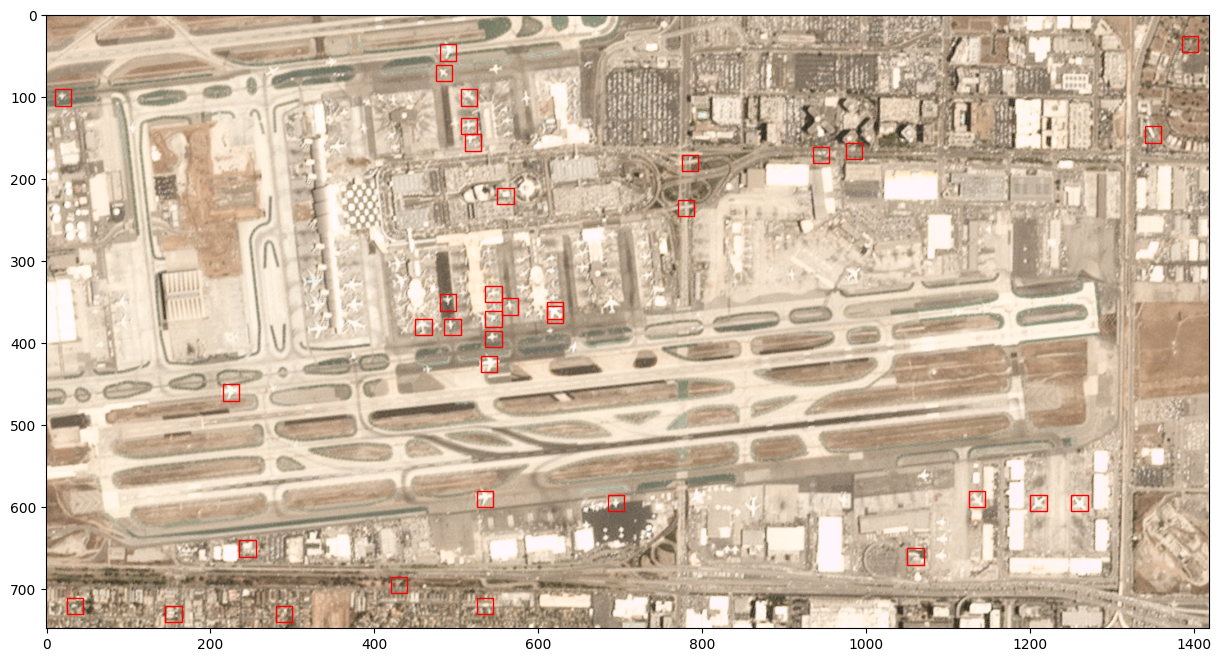

In [29]:
# Load and show scene
basepath = "./data/scenes/scenes"

scene_list = glob(os.path.join(basepath, "*3*"))
scene_file = scene_list[0]

img = cv2.imread(scene_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape

plt.figure(figsize=(15, 15))
ax = plt.subplot(1, 1, 1)
ax.imshow(img)

stride = 5
for h in range(0, height-20, stride):
    print("Step", int(h/stride), "of", int((height-20)/stride))
    
    for w in range(0, width-20, stride):  
        img_box = []
        img_box.append(img[h:h+20, w:w+20])
        img_box = np.array(img_box, dtype=np.int64)
        prediction = model.predict(img_box, verbose=False)
        prediction = np.argmax(prediction)
        
        if prediction == 1:
            ax.add_patch(patches.Rectangle((w, h), 20, 20, edgecolor='r', facecolor='none'))
            
plt.show()